# 📁 Forex Price Data

# Options Chain Data from Yahoo! Finance

In the previous sections, you have fetched a range of market data on stocks and currencies from Yahoo! Finance.  Additionally, it also offers options chain data for the US equities market. In this notebook, you will learn to get the call and puts options chain data from Yahoo! Finance. 

The notebook is divided into the following parts:
1. [Get Available Expiration Dates](#expiration_dates) 
2. [Options Chain Data](#options_chain)<br>
    2.1. [Get Calls Data](#calls_data)<br>
    2.2. [Get Puts Data](#puts_data)
    
Note: At times, downloading the data may give you errors due to changes in yahoo finance. 

In such cases, it is recommended to upgrade the `yfinance` package using `pip install --upgrade yfinance`. You can update the 'cell type' for the below from 'Raw NBConvert' to a 'Code' cell. Then restart the kernel and run all of the following cells again.

## Import Libraries

In [ ]:
# Import yfinance package
import yfinance as yf
import numpy as np

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id='expiration_dates'></a> 
## Get Available Expiration Dates

First, create a ticker object for a particular ticker (stock) for which you want the options chain data. To do that, you need to call the `Ticker` method of `yfinance`.

To get the expiration dates for options of a particular ticker, you need to call the `options` method. 

In [ ]:
# Create ticker object for Microsoft
msft = yf.Ticker('MSFT')

# Call the options on the ticker object to get the expiration dates
msft.options

('2024-09-13',
 '2024-09-20',
 '2024-09-27',
 '2024-10-04',
 '2024-10-11',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-04-17',
 '2025-06-20',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18')

The above data shows the list of all available expiration dates for Microsoft options chain data.

<a id='options_chain'></a> 
## Options Chain Data

To download options data, you can use the `option_chain` method. 

Syntax: 
```python
ticker_object.option_chain(expiration_date)
```
Parameters:

* `expiration_date`: Expiry date in the YYYY-MM-DD format. If none, returns all options data.

You can use `calls` and `puts` methods to get the calls and puts options chain data, respectively.

In [ ]:
# Get options chain for specific expiration date
option_chain = msft.option_chain(date=msft.options[0])

<a id='calls_data'></a>
### Get Calls Data

In [ ]:
# Get Microsoft calls options chain data
option_chain.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240913C00270000,2024-08-26 18:14:43+00:00,270.0,143.30,131.25,133.35,0.0,0.0,NaN,1,1.569338,True,REGULAR,USD
1,MSFT240913C00280000,2024-08-05 13:56:07+00:00,280.0,117.41,128.05,129.90,0.0,0.0,NaN,1,2.536259,True,REGULAR,USD
2,MSFT240913C00295000,2024-08-05 13:50:43+00:00,295.0,103.40,113.05,114.90,0.0,0.0,NaN,1,2.260014,True,REGULAR,USD
3,MSFT240913C00300000,2024-09-05 18:58:13+00:00,300.0,108.39,101.30,103.40,0.0,0.0,4.0,10,1.218754,True,REGULAR,USD
4,MSFT240913C00305000,2024-08-05 13:50:43+00:00,305.0,93.80,103.10,104.95,0.0,0.0,NaN,2,2.085820,True,REGULAR,USD


The above output shows the call options chain for stock Microsoft. The option chain shows the bid, ask, and last traded price for different strike prices with date and time. It also shows the volume and open interest data for all strike prices.

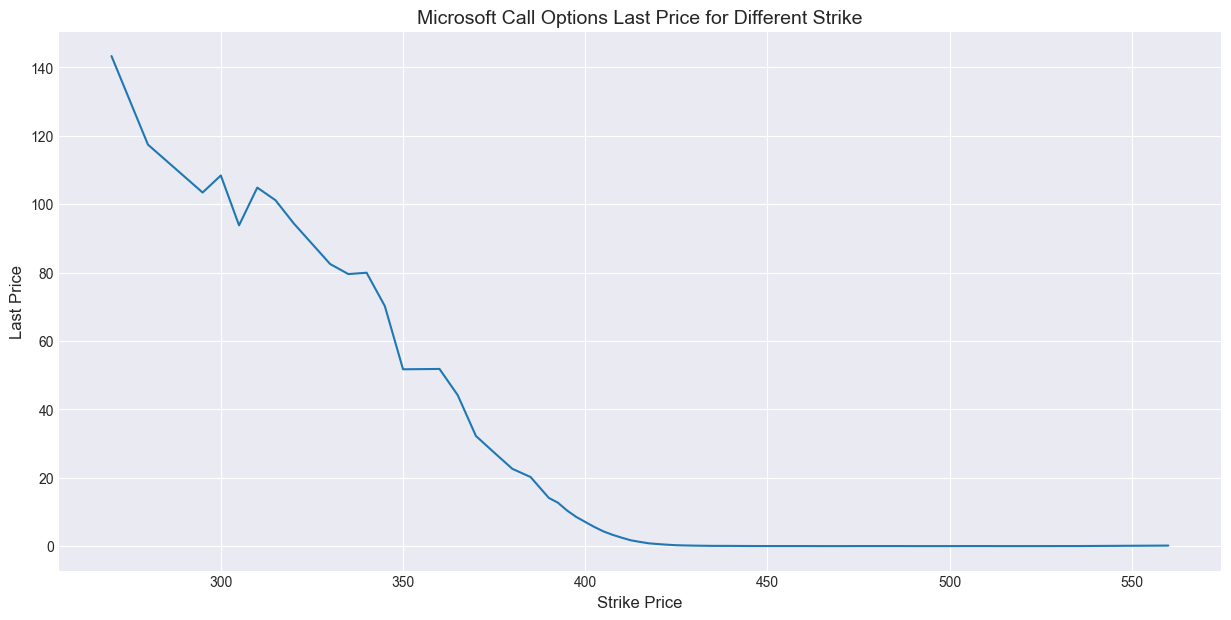

In [ ]:
# Convert data to numpy arrays
call_strike_prices = np.array(option_chain.calls.strike)
call_last_prices = np.array(option_chain.calls.lastPrice)

# Plot call strike price vs call last traded price 
plt.figure(figsize=(15, 7))
plt.plot(call_strike_prices, call_last_prices)
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Call Options Last Price for Different Strike', fontsize=14)
plt.show()

The above chart shows the Microsoft call options last traded price for different strike prices. As you can see, the call options price gradually falls as the strike price increases. Or in other words, options call price is higher for in the money options than out of the money options.

<a id='puts_data'></a>
### Get Puts Data

In [ ]:
# Get Microsoft puts options chain data
option_chain.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240913P00230000,2024-09-06 19:36:27+00:00,230.0,0.01,0.0,0.01,-0.18,-94.73684,350.0,9,1.281254,False,REGULAR,USD
1,MSFT240913P00240000,2024-09-06 14:28:18+00:00,240.0,0.01,0.0,0.01,-0.09,-90.00000,3.0,2,1.187504,False,REGULAR,USD
2,MSFT240913P00270000,2024-09-03 13:56:22+00:00,270.0,0.01,0.0,0.15,0.00,0.00000,1.0,1,1.195317,False,REGULAR,USD
3,MSFT240913P00280000,2024-09-06 19:35:49+00:00,280.0,0.01,0.0,0.15,-0.12,-92.30769,105.0,5,1.093755,False,REGULAR,USD
4,MSFT240913P00290000,2024-08-28 19:55:01+00:00,290.0,0.05,0.0,0.16,0.00,0.00000,1.0,21,1.003911,False,REGULAR,USD


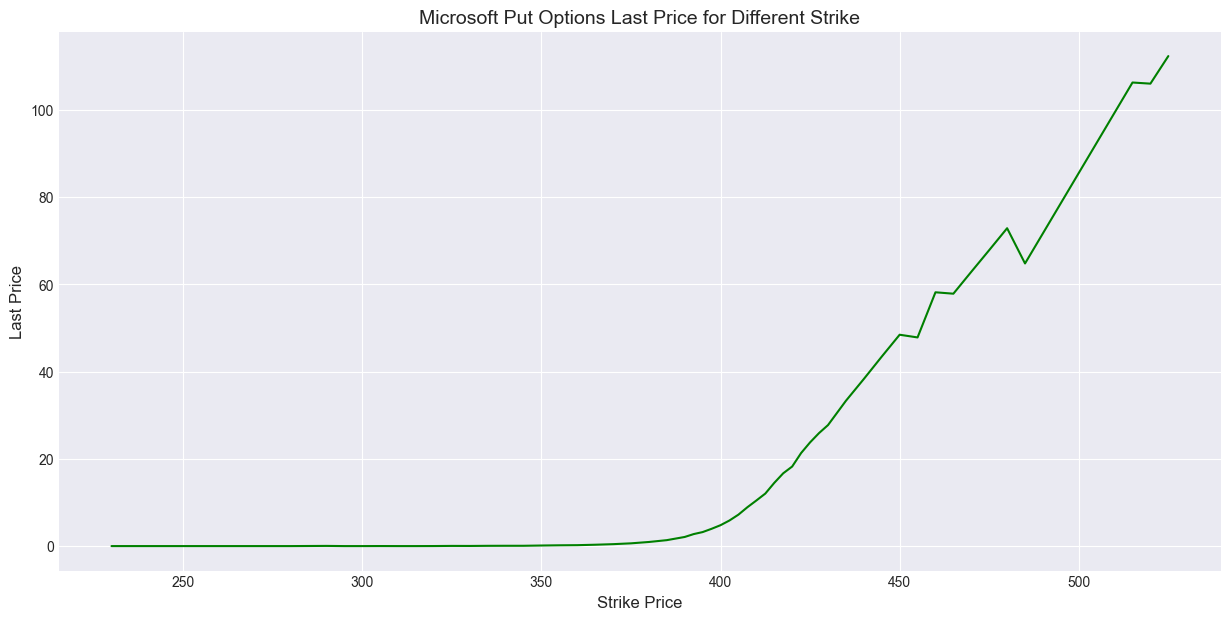

In [ ]:
# Convert data to numpy arrays
put_strike_prices = np.array(option_chain.puts.strike)
put_last_prices = np.array(option_chain.puts.lastPrice)

# Plot put strike price vs put last traded price
plt.figure(figsize=(15, 7))
plt.plot(put_strike_prices, put_last_prices, color='g')
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Put Options Last Price for Different Strike', fontsize=14)
plt.show()

The above chart shows the Microsoft puts options last traded price for different strike prices. As you can see, the puts options price gradually rises as the strike price increases or the strike price goes from out of the money to in the money.

In the next section, you will learn to fetch stock fundamental data. <br><br>

## Plot the Close Price

<Figure size 1000x700 with 0 Axes>

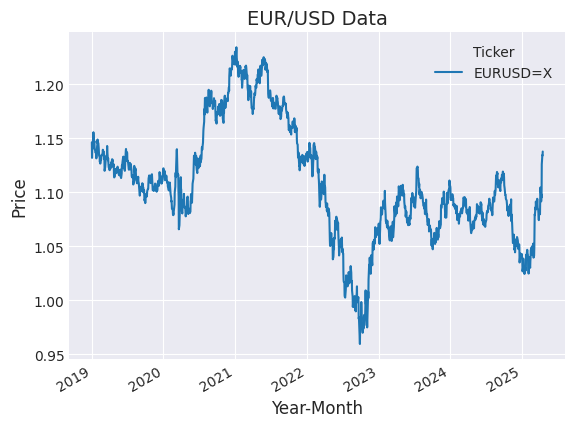

In [3]:
# Plot the close price
plt.figure(figsize=(10,7))
forex_data['Close'].plot()

# Set the title and axis label
plt.title('EUR/USD Data', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()

<a id='minute-data'></a> 
## Minute FX Price Data

By now, you can guess how to download the FX price data of minute frequency. Pass the proper `ticker`, `period` and `interval` to the `download` method of `yfinance`.

In [5]:
def format_xlabels(data, ax):
    """This function will format the x-labels of the graph
    """
    num_x_values = data.shape[0]
    step_size = num_x_values // 4    

    ax.set_xticks(np.arange(num_x_values))
    ax.set_xticklabels(data.index.values, rotation=45)
   
    for i, label in enumerate(ax.get_xticklabels()):
        if not i%step_size==0:
            label.set_visible(False)  
    label.set_visible(True)

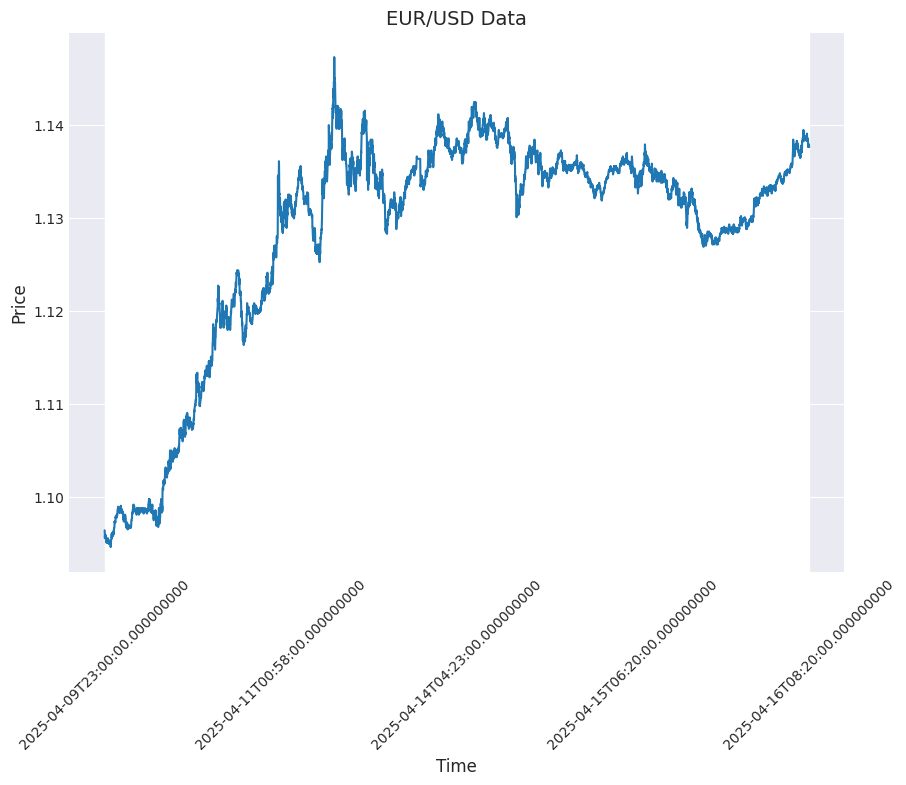

In [6]:
# Number of points to plot
x_values = forex_data_minute['Close'].shape[0]

# Plot the series
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(range(x_values), forex_data_minute['Close'])

# Set title and axis label
plt.title('EUR/USD Data', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Format the xlabel
format_xlabels(forex_data_minute['Close'], ax)

# Show the plot
plt.show()

# 📁 Cryptocurrency Data

## Import Libraries

In [1]:
# Import library for cryptocompare data
import cryptocompare

# Import data manipulation library
import pandas as pd

# Import datetime package
from datetime import datetime

# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-v0_8-whitegrid")

# Quantra function to fetch the cryptocompare API key
import sys
sys.path.append("..")
from data_modules.FMDA_quantra import get_cryptocompare_api

<a id='set'></a> 
## Set API Key

You will set the API key in the `cryptocompare` Python object. This object will be used to fetch data from [CryptoCompare](https://www.cryptocompare.com/).

In this notebook, the API keys are fetched using the `get_cryptocompare_api` function from the `FMDA_quantra.py` file. If you want to run this code on your local machine, then you must add your own API key in the `FMDA_quantra.py` file located inside the `data_modules` folder.

In [2]:
# Get the API key from the Quantra file located inside the data_modules folder
cryptocompare_API_key = get_cryptocompare_api()

# Set the API key in the cryptocompare object
cryptocompare.cryptocompare._set_api_key_parameter(cryptocompare_API_key)

print("API Key set!")

Your API key is missing.
API Key set!


<a id='tickers'></a> 
## Fetch Tickers

All the cryptocurrency tickers are fetched from the cryptocompare database.

In [3]:
# Fetch the raw ticker list
raw_ticker_data = cryptocompare.get_coin_list()

# Convert the raw data from dictionary format to DataFrame
all_tickers = pd.DataFrame.from_dict(raw_ticker_data).T

# Preview the last 5 entries of the ticker list
all_tickers.tail()

,Id,Url,ImageUrl,ContentCreatedOn,Name,Symbol,CoinName,FullName,Description,AssetTokenStatus,Algorithm,ProofType,SortOrder,Sponsored,Taxonomy,Rating
DEEPSEEKAI,971963,/coins/deepseekai/overview,/media/45958380/deepseekai.png,1744704395,DEEPSEEKAI,DEEPSEEKAI,DeepSeek AI Agent,DeepSeek AI Agent (DEEPSEEKAI),,N/A,N/A,N/A,18526,False,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa..."
DEEPS,971965,/coins/deeps/overview,/media/45958381/deeps.png,1744704893,DEEPS,DEEPS,DeepSeek AI,DeepSeek AI (DEEPS),,N/A,N/A,N/A,18527,False,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa..."
DEEPSE,971967,/coins/deepse/overview,/media/45958382/deepse.png,1744711673,DEEPSE,DEEPSE,DeepSeek AI Assistant,DeepSeek AI Assistant (DEEPSE),,N/A,N/A,N/A,18528,False,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa..."
PALCOINV1,971968,/coins/palcoinv1/overview,/media/45958362/palcoin.png,1744712104,PALCOINV1,PALCOINV1,PALCOIN Venture Capital v1,PALCOIN Venture Capital v1 (PALCOINV1),,N/A,N/A,N/A,18529,False,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa..."
DEEPSEE,971970,/coins/deepsee/overview,/media/45958383/deepsee.png,1744712199,DEEPSEE,DEEPSEE,DeepSeek AI,DeepSeek AI (DEEPSEE),,N/A,N/A,N/A,18530,False,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa..."


<a id='historical'></a> 
## Historical Data

You can fetch the historical data for the ticker symbol you want. The historical data in daily, hourly, and minute frequency levels are available.

Syntax: 
```python
# For daily data
cryptocompare.get_historical_price_day(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# For hourly data
cryptocompare.get_historical_price_hour(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# For minute data
cryptocompare.get_historical_price_minute(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)
```
Where
1. ticker_symbol: Ticker symbol whose data is required
1. currency: Currency in which the price is quoted
1. limit_value: The maximum number of bars to fetch (max. value is 2000)
1. exchange_name: The exchange to use when fetching the data
1. data_before_timestamp: Return the data before this timestamp (UNIX epoch time or a `datetime` object)

Returns:

A dictionary containing the historical data.

For illustration purposes, let's extract the hourly historical data for the `BTC` before 01-May-2021.

In [4]:
# Define the ticker symbol and other details
ticker_symbol = 'BTC'
currency = 'USD'
limit_value = 2000
exchange_name = 'CCCAGG'
data_before_timestamp = datetime(2021, 5, 1, 0, 0)

# Fetch the raw price data
raw_price_data = \
       cryptocompare.get_historical_price_hour(
                                                 ticker_symbol,\
                                                 currency,\
                                                 limit=limit_value,\
                                                 exchange=exchange_name,\
                                                 toTs=data_before_timestamp\
                                                )

# Convert the raw price data into a DataFrame
hourly_price_data = pd.DataFrame.from_dict(raw_price_data)

# Set the time columns as index and convert it to datetime
hourly_price_data.set_index("time", inplace=True)
hourly_price_data.index = pd.to_datetime(hourly_price_data.index, unit='s')

# Preview the first 5 values of the DataFrame
hourly_price_data.head()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-02-06 16:00:00,40989.11,40545.93,40924.52,3287.05,1.340977e+08,40664.29,direct,
2021-02-06 17:00:00,40695.64,40247.50,40664.29,2148.35,8.706663e+07,40256.43,direct,
2021-02-06 18:00:00,40495.78,40129.66,40256.43,2239.22,9.020051e+07,40340.82,direct,
2021-02-06 19:00:00,40461.38,40044.90,40340.82,1396.82,5.619140e+07,40218.75,direct,
2021-02-06 20:00:00,40221.93,39680.22,40218.75,2754.49,1.098517e+08,40141.36,direct,


<a id='plot'></a> 
## Plot the Data

The `close` price is plotted for better visualisation.

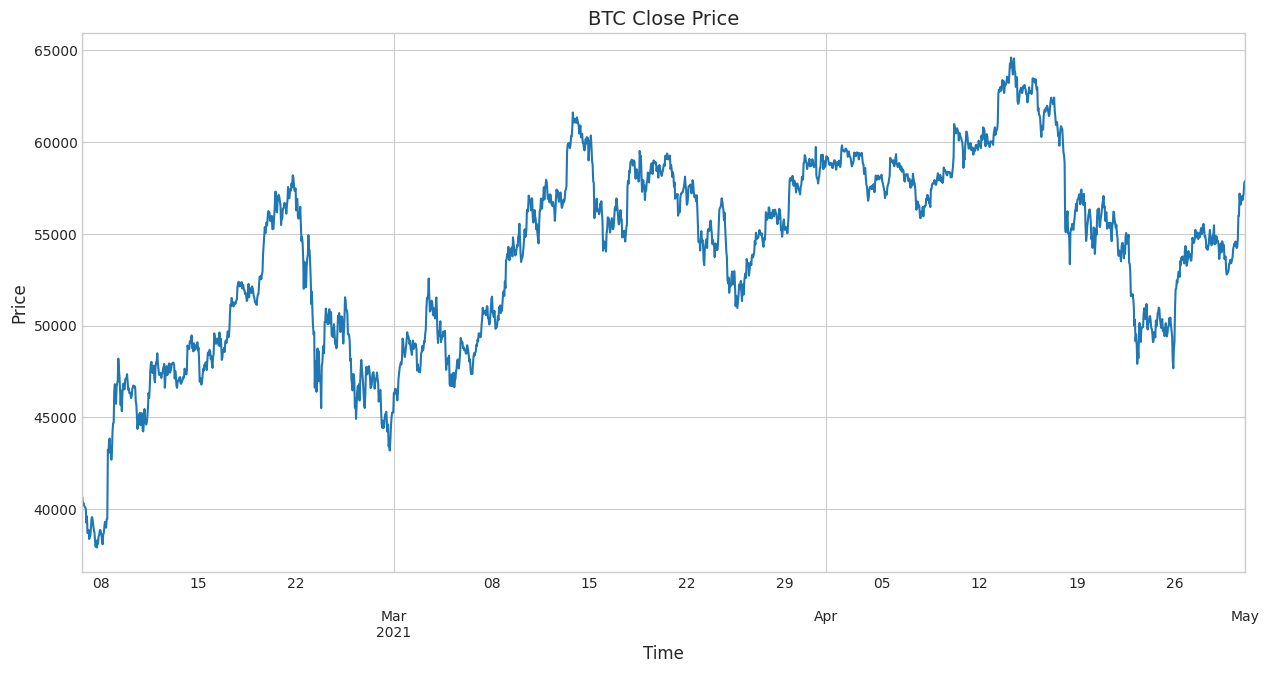

In [5]:
# Plot the close price
(hourly_price_data.close).plot(figsize=(15, 7))

# Set title and labels for the plot
plt.title('BTC Close Price', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# 📁 Futures Data

<a id='plot'></a> 
## Plot the Data

The `Adj Close` price is plotted for better visualisation.

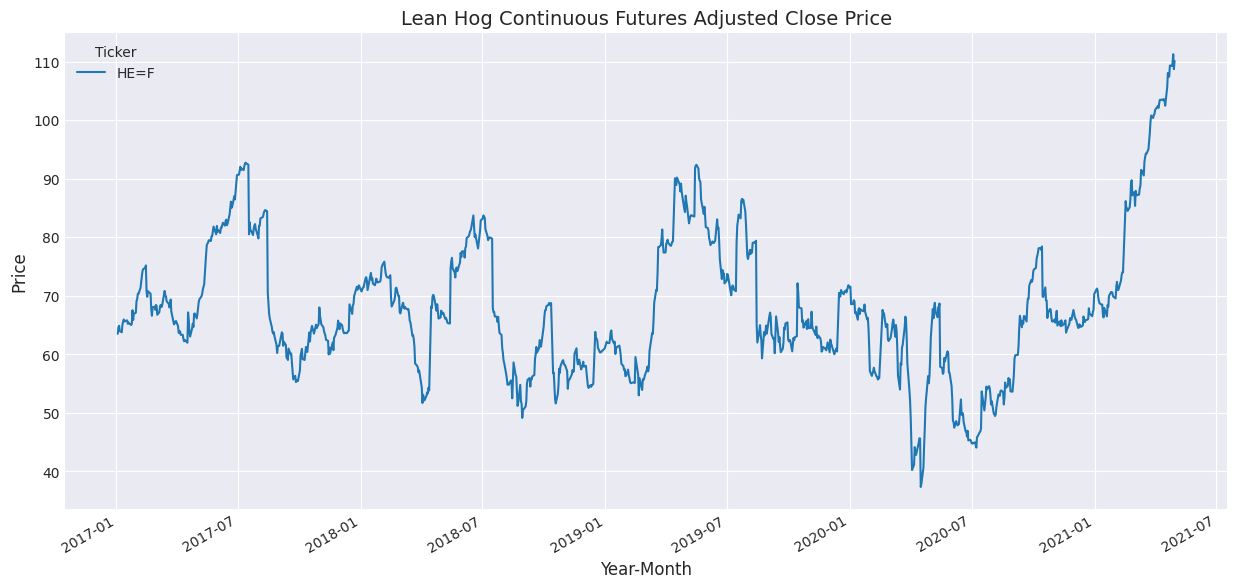

In [3]:
# Plot the adjusted close price
(futures_data['Close']).plot(figsize=(15, 7))

# Set title and labels for the plot
plt.title('Lean Hog Continuous Futures Adjusted Close Price', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# 📁 Futures Continuations

# Futures Continuations

To build a futures continuation, you need to adjust the contracts back in time. This is done because, at expiry, there can be a price difference between the first contract and the second contract. This price jump is artificially introduced in the continuation if we do not adjust it. The simplest way to adjust it is by adding/subtracting a factor so that the last value of the first contract matches the first value of the second contract. This way you can get a continuous time series.

A drawback of the adjustment by addition is that long term time series can sometimes go negative after many years of such adjustments. Another drawback is that percentage changes are not kept intact, which makes the calculation of returns difficult.

To avoid this problem, you can use proportional adjustment. In proportional adjustment, when you are rolling from one month to the next, the first contract is shifted by a ratio instead of adding a fixed number. The main advantage is that percentage moves are kept intact, making ratio style calculations possible.

In this notebook, you will learn how to perform an adjustment on two contracts.

The notebook is divided into the following parts:

1. [Read the Data](#read)
1. [Proportional Adjustment](#prop_adj)

## Import Libraries

In [1]:
# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

# Data manipulation library
import pandas as pd

<a id='read'></a>
## Read the Data

Here we will read two futures contracts. These two contracts are the futures data for Lean Hogs of October 2020 and December 2020 expiry. The data files used in this notebook are available in the downloadable zip file in the last section of this course. If you want to work with futures data of your own choice, you can refer to the different sources of historical futures data available in the next unit.

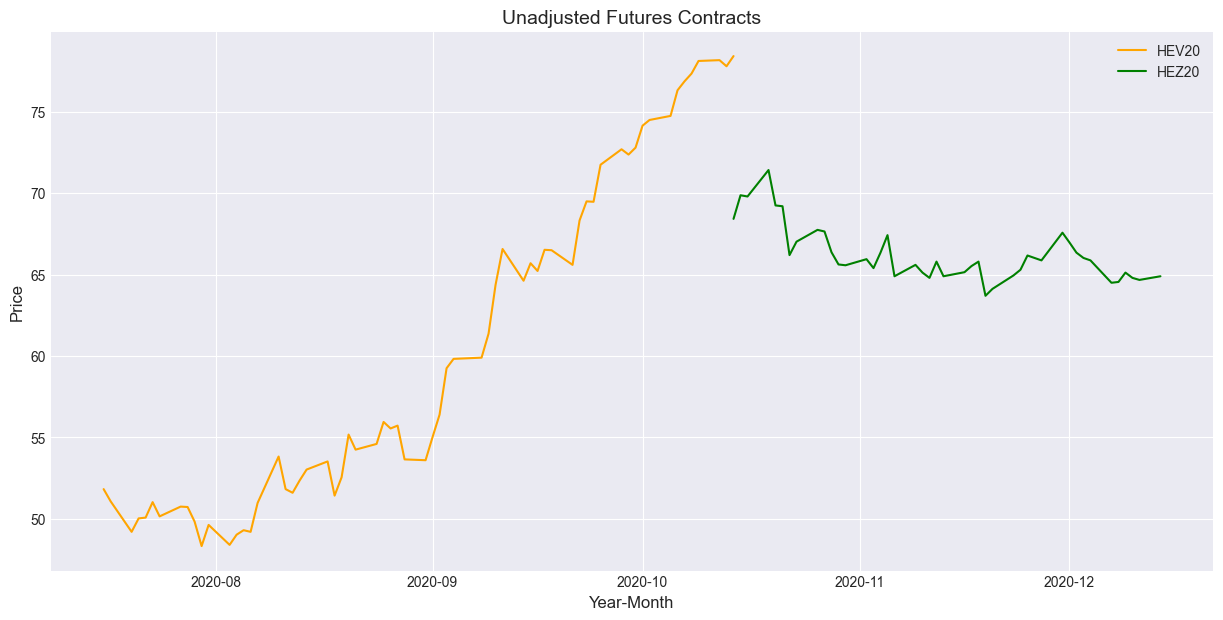

In [2]:
# Path to read the data files
path = "../data_modules/"

# Read the data
# First contract: Lean Hogs October 2020 Futures
first_contract_data = pd.read_csv(path + "HEV20.csv",
                                  index_col=0, parse_dates=True)

# Second contract: Lean Hogs December 2020 Futures
second_contract_data = pd.read_csv(path + "HEZ20.csv",
                                   index_col=0, parse_dates=True)

# Define the plot size
plt.figure(figsize=(15, 7))
plt.title('Unadjusted Futures Contracts', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Plotting the first contract
plt.plot(first_contract_data.Settle, label="HEV20", color='orange')

# Plotting the second contract, after the first contract expires
first_contract_expiry = first_contract_data.index.max()
plt.plot(second_contract_data.Settle.loc[first_contract_expiry:],
         label="HEZ20", color='green')

# Adding the legend
plt.legend()

# Show the plot
plt.show()

<a id='prop_adj'></a>
## Proportional adjustment

The two contracts will be made continuous by proportional adjustment. The ratio of the price of the second contract to the first contract (on the expiry date of the first contract) is the proportional adjustment factor.

You can get continuous futures data using the following steps:
1. Get the price of the `first` contract and the `next` contract on the `rollover` date.<br>The `rollover` date is the date when you rolled your position from the first contract to the second contract.<br>In this notebook, we have considered the `rollover` date as the `expiry` date. That is, on the first contract expiry date, we will rollover from the first contract to next month's contract.
1. Calculate the adjustment factor as:
$$ \text{Adjustment factor} = \frac{\text{Second contract's price}}{\text{First contract's price}} $$<br>
1. Store the first contract's data in the variable named `continuous_futures_proportional`.
1. Multiply the adjustment factor to the `continuous_futures_proportional` till the expiry of the first contract.
1. Append the second contract to `continuous_futures_proportional` to get the continuous data.

The price of the first contract on 2020-10-14 00:00:00 is $78.425.
The price of the second contract on 2020-10-14 00:00:00 is $68.425.
The adjustment factor to multiply to the first contract is 0.872.


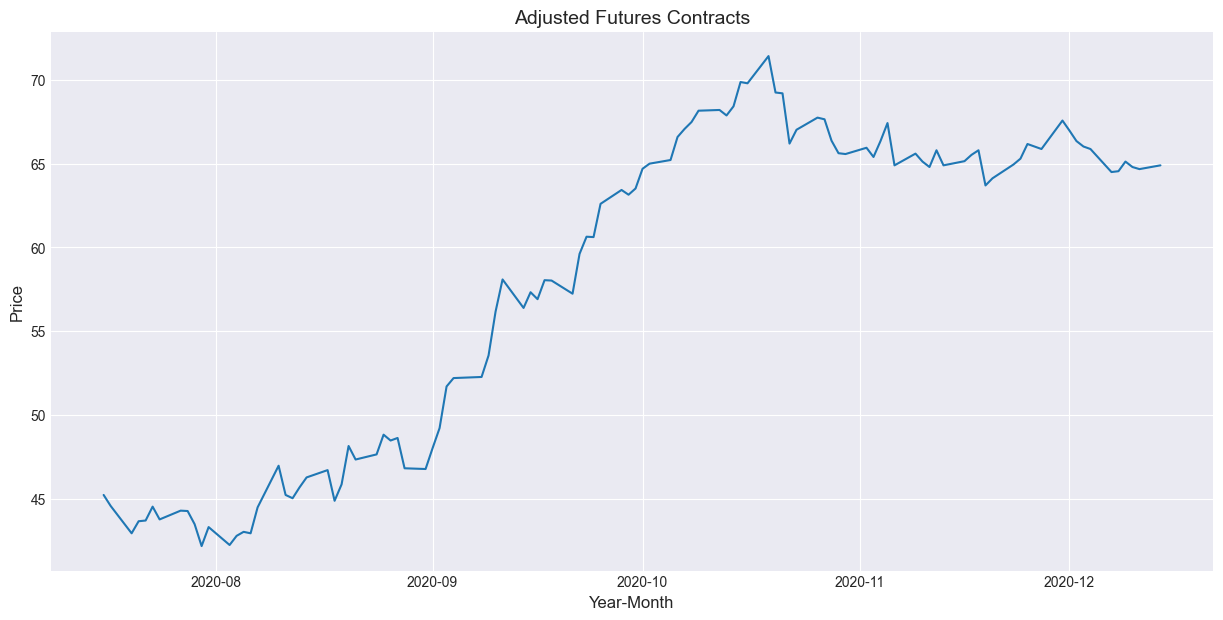

In [3]:
# First contract price
first_contract_on_expiry = first_contract_data.loc[first_contract_expiry].Settle

# Second contract price
second_contract_on_rollover = second_contract_data.loc[first_contract_expiry].Settle

# Proportional adjustment factor
adjustment_factor = second_contract_on_rollover / first_contract_on_expiry

# Make the continuous futures series without adjustment
continuous_futures_proportional = first_contract_data.loc[:first_contract_expiry].Settle.copy()

# Multiply the adjustment factor to the continuous series till the expiry of the first contract
continuous_futures_proportional *= adjustment_factor

# Concatenate the second contract data to the continuous series
continuous_futures_proportional = pd.concat(
    [continuous_futures_proportional, second_contract_data.loc[first_contract_expiry:].Settle]
)

# Print the prices
print(f"The price of the first contract on {first_contract_expiry} is ${first_contract_on_expiry}.")
print(f"The price of the second contract on {first_contract_expiry} is ${second_contract_on_rollover}.")
print(f"The adjustment factor to multiply to the first contract is {round(adjustment_factor, 3)}.")

# Define the plot size
plt.figure(figsize=(15, 7))
plt.title('Adjusted Futures Contracts', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Plotting the continuous contract
plt.plot(continuous_futures_proportional)

# Show the plot
plt.show()

The proportional adjustment you have done here is technically called the `end-to-end roll` with the `backwards ratio` method. 

1. The `end-to-end roll` means rolling the contract on the expiry date of the first contract.

1. The `backwards ratio` method is another name for the proportional adjustment where the price of the current contract is preserved, and the previous contracts are adjusted.

The data used in the notebooks are available in the downloadable zip file in the last section of the course. If you would like to work with different data, you can check out the additional reading list for the sources of futures data listed in the additional reading at the end of this section.
<br><br>

# Options Chain Data from Yahoo! Finance

In the previous sections, you have fetched a range of market data on stocks and currencies from Yahoo! Finance.  Additionally, it also offers options chain data for the US equities market. In this notebook, you will learn to get the call and puts options chain data from Yahoo! Finance. 

The notebook is divided into the following parts:
1. [Get Available Expiration Dates](#expiration_dates) 
2. [Options Chain Data](#options_chain)<br>
    2.1. [Get Calls Data](#calls_data)<br>
    2.2. [Get Puts Data](#puts_data)
    
Note: At times, downloading the data may give you errors due to changes in yahoo finance. 

In such cases, it is recommended to upgrade the `yfinance` package using `pip install --upgrade yfinance`. You can update the 'cell type' for the below from 'Raw NBConvert' to a 'Code' cell. Then restart the kernel and run all of the following cells again.

## Import Libraries

In [ ]:
# Import yfinance package
import yfinance as yf
import numpy as np

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id='expiration_dates'></a> 
## Get Available Expiration Dates

First, create a ticker object for a particular ticker (stock) for which you want the options chain data. To do that, you need to call the `Ticker` method of `yfinance`.

To get the expiration dates for options of a particular ticker, you need to call the `options` method. 

In [ ]:
# Create ticker object for Microsoft
msft = yf.Ticker('MSFT')

# Call the options on the ticker object to get the expiration dates
msft.options

('2024-09-13',
 '2024-09-20',
 '2024-09-27',
 '2024-10-04',
 '2024-10-11',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-04-17',
 '2025-06-20',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18')

The above data shows the list of all available expiration dates for Microsoft options chain data.

<a id='options_chain'></a> 
## Options Chain Data

To download options data, you can use the `option_chain` method. 

Syntax: 
```python
ticker_object.option_chain(expiration_date)
```
Parameters:

* `expiration_date`: Expiry date in the YYYY-MM-DD format. If none, returns all options data.

You can use `calls` and `puts` methods to get the calls and puts options chain data, respectively.

In [ ]:
# Get options chain for specific expiration date
option_chain = msft.option_chain(date=msft.options[0])

<a id='calls_data'></a>
### Get Calls Data

In [ ]:
# Get Microsoft calls options chain data
option_chain.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240913C00270000,2024-08-26 18:14:43+00:00,270.0,143.30,131.25,133.35,0.0,0.0,NaN,1,1.569338,True,REGULAR,USD
1,MSFT240913C00280000,2024-08-05 13:56:07+00:00,280.0,117.41,128.05,129.90,0.0,0.0,NaN,1,2.536259,True,REGULAR,USD
2,MSFT240913C00295000,2024-08-05 13:50:43+00:00,295.0,103.40,113.05,114.90,0.0,0.0,NaN,1,2.260014,True,REGULAR,USD
3,MSFT240913C00300000,2024-09-05 18:58:13+00:00,300.0,108.39,101.30,103.40,0.0,0.0,4.0,10,1.218754,True,REGULAR,USD
4,MSFT240913C00305000,2024-08-05 13:50:43+00:00,305.0,93.80,103.10,104.95,0.0,0.0,NaN,2,2.085820,True,REGULAR,USD


The above output shows the call options chain for stock Microsoft. The option chain shows the bid, ask, and last traded price for different strike prices with date and time. It also shows the volume and open interest data for all strike prices.

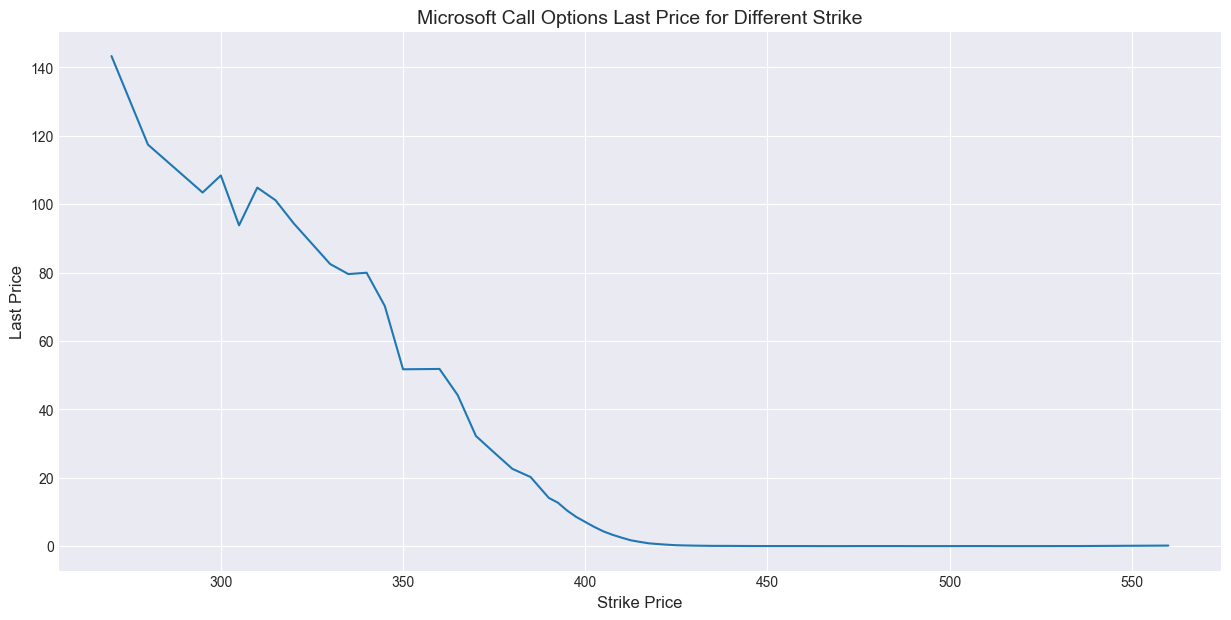

In [ ]:
# Convert data to numpy arrays
call_strike_prices = np.array(option_chain.calls.strike)
call_last_prices = np.array(option_chain.calls.lastPrice)

# Plot call strike price vs call last traded price 
plt.figure(figsize=(15, 7))
plt.plot(call_strike_prices, call_last_prices)
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Call Options Last Price for Different Strike', fontsize=14)
plt.show()

The above chart shows the Microsoft call options last traded price for different strike prices. As you can see, the call options price gradually falls as the strike price increases. Or in other words, options call price is higher for in the money options than out of the money options.

<a id='puts_data'></a>
### Get Puts Data

In [ ]:
# Get Microsoft puts options chain data
option_chain.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240913P00230000,2024-09-06 19:36:27+00:00,230.0,0.01,0.0,0.01,-0.18,-94.73684,350.0,9,1.281254,False,REGULAR,USD
1,MSFT240913P00240000,2024-09-06 14:28:18+00:00,240.0,0.01,0.0,0.01,-0.09,-90.00000,3.0,2,1.187504,False,REGULAR,USD
2,MSFT240913P00270000,2024-09-03 13:56:22+00:00,270.0,0.01,0.0,0.15,0.00,0.00000,1.0,1,1.195317,False,REGULAR,USD
3,MSFT240913P00280000,2024-09-06 19:35:49+00:00,280.0,0.01,0.0,0.15,-0.12,-92.30769,105.0,5,1.093755,False,REGULAR,USD
4,MSFT240913P00290000,2024-08-28 19:55:01+00:00,290.0,0.05,0.0,0.16,0.00,0.00000,1.0,21,1.003911,False,REGULAR,USD


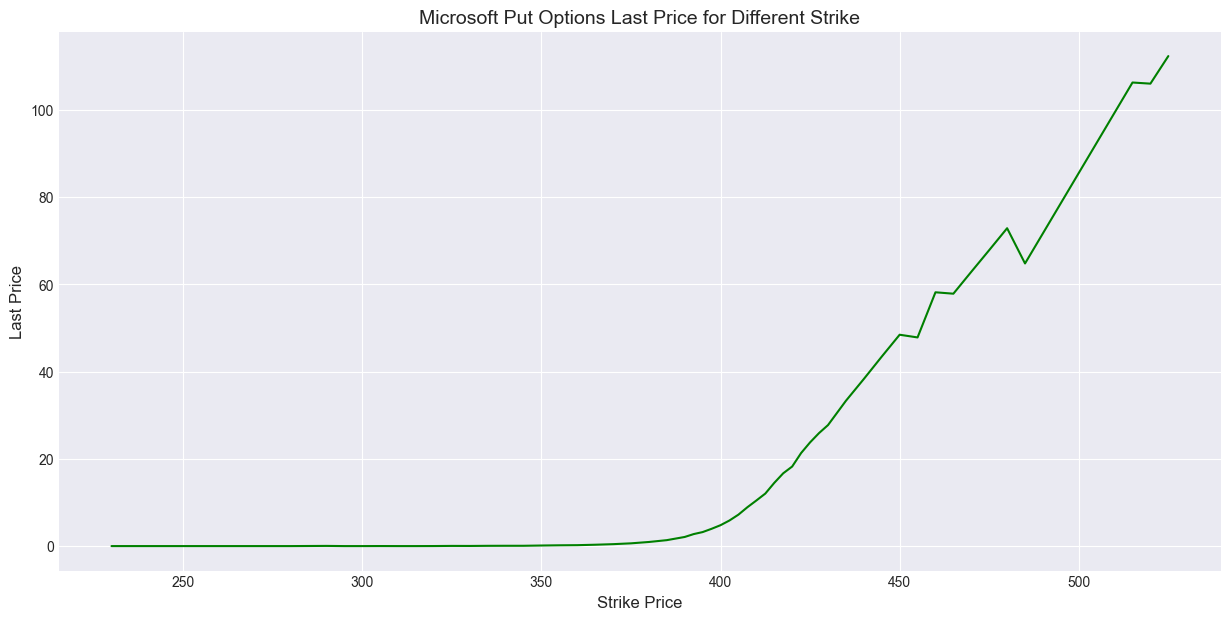

In [ ]:
# Convert data to numpy arrays
put_strike_prices = np.array(option_chain.puts.strike)
put_last_prices = np.array(option_chain.puts.lastPrice)

# Plot put strike price vs put last traded price
plt.figure(figsize=(15, 7))
plt.plot(put_strike_prices, put_last_prices, color='g')
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Put Options Last Price for Different Strike', fontsize=14)
plt.show()

The above chart shows the Microsoft puts options last traded price for different strike prices. As you can see, the puts options price gradually rises as the strike price increases or the strike price goes from out of the money to in the money.

In the next section, you will learn to fetch stock fundamental data. <br><br>